# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Fitri Fatma Dewi
- **Email:** fitriworkspace12@gmail.com
- **ID Dicoding:** MC004D5X1425

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: **Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?**

Analisis ini bertujuan untuk memahami apakah faktor cuaca, memiliki dampak signifikan terhadap jumlah penyewaan sepeda.

- Pertanyaan 2: **Kapan waktu optimal bagi pelanggan untuk menyewa sepeda berdasarkan tren penggunaan?**

Analisis ini akan mengidentifikasi pola penggunaan sepeda berdasarkan jam operasional untuk menentukan waktu dengan permintaan tertinggi dan terendah, sehingga dapat membantu optimalisasi layanan.


## Import Semua Packages/Library yang Digunakan

In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [256]:
# Data Day
day_df = pd.read_csv('Data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [257]:
# Data Hour
hour_df = pd.read_csv('Data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Mengimport dan menampilkan data day
- Mingimport dan menampilkan data hour

### Assessing Data

##### Menilai Data day_df

In [258]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [259]:
print("Jumlah duplikasi Data day_df: ", day_df.duplicated().sum())

Jumlah duplikasi Data day_df:  0


In [260]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


##### Menilai Data hour_df

In [261]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [262]:

print("Ju|mlah duplikasi Data hour_df: ", hour_df.duplicated().sum())

Ju|mlah duplikasi Data hour_df:  0


In [263]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Untuk Data **day_df**, masing-masing variabelnya memiliki jumlah yang sama, sehingga tidak terdapat missing value.
- Uji Duplikat data pada **day_df** juga menunjukkan jumlah 0, artinya tidak terdapat data duplikat.
- Pada Data **hour_df**, masing-masing variabelnya memiliki jumlah yang sama, sehingga tidak terdapat missing value.
- Dilakukan Uji Duplikat data pula untuk **hour_df**, dan terindikasi tidak terdapat data duplikat.
- Namun, variabel dteday pada kedua data di atas, terindikasi terdapat kesalahan type data, harusnya ia bertipe data "date", bukan "object". **Akan di tangani pada tahap data cleaning.**
- Terakhir, untuk analisis deskripsi statistik, kedua data terindikasi aman, dan tidak ada nilai data yang bermasalah. Semuanya nilai data sudah sesuai.

### Cleaning Data

##### Mengganti type data variabel "dteday"

In [264]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
  hour_df[column] = pd.to_datetime(hour_df[column])

In [265]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [266]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

##### Mengganti nama variabel yang susah diingat

In [267]:
day_df.rename(columns={
    "dteday": "date",
    "yr": "year",
    "mnth": "month",
    "hum":"humidity",
    "cnt":"count"
}, inplace=True)

In [268]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  humidity    731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  count       731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [269]:
hour_df.rename(columns={
    "dteday": "date",
    "yr": "year",
    "mnth": "month",
    "hum":"humidity",
    "hr": "hour",
    "cnt":"count"
}, inplace=True)

In [270]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   year        17379 non-null  int64         
 4   month       17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  humidity    17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

#### Menyimpan data hour_df yang sudah di cleaning, sebagai main data untuk Dashboard

In [284]:
hour_df.to_csv("hour_cleaned_data.csv", index=False)

**Insight:**
- Mengganti type variabel dtaday, dari  "object" menjadi "datetime"
- Mengganti nama variabel yang susah ditulis/diingat seperti **dteday, yr, mnth, hum, hr, dan cnt**. Menjadi **date,year, month, humidity, hour, dan count.**

## Exploratory Data Analysis (EDA)

##### Exploratory Data day_df

In [272]:
day_df.describe(include="all")

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [273]:
day_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "count": ["max", "min", "mean", "std"]
})

instant count                               
           nunique   max  min         mean          std
weathersit                                             
1              463  8714  431  4876.786177  1879.483989
2              247  8362  605  4035.862348  1809.109918
3               21  4639   22  1803.285714  1240.284449

Berdasarkan pivot table di atas, dapat disimpulkan bahwa penyewa yang paling banyak terdapat pada saat kondisi cuaca pada kategori 1, yakni saat cuaca *Clear* (Cerah), *Few clouds* (sedikit berawan), *Partly cloudy* (sebagian berawan). Lalu keragaman banyaknya penyewa pada kondisi cuaca 1 juga paling besar, ditunjukkan dengan standard deviasi terbesar, artinya jumlah penyewa pada kondisi cuaca 1 sangat beragam dengan **minimal 431** penyewa dan **maksimal 463** penyewa.

In [274]:
day_df.groupby(by="season").instant.nunique().sort_values(ascending=False)

season
3    188
2    184
1    181
4    178
Name: instant, dtype: int64

Berdasarkan seasonnya, Season dengan penyewa terbanyak adalah season 3 yakni pada saat musim gugur (*fall*)

##### Exploratory Data hour_df

In [275]:
hour_df.describe()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [276]:
hour_df.groupby(by="weekday").instant.nunique().sort_values(ascending=False)

weekday
6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: instant, dtype: int64

Berdasarkan harinya, Hari dengan penyewa terbanyak adalah hari ke-6 atau Minggu.

In [277]:
hour_df.groupby(by=["year", "season"]).agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum",
})

casual  registered   count
year season                            
0    1        21425      128575  150000
     2        77564      269752  347316
     3        95450      324200  419650
     4        52813      273324  326137
1    1        39197      282151  321348
     2       125958      445315  571273
     3       130641      510838  641479
     4        76969      438507  515476

Melihat dari banyaknya total penyewa, Pada tahun 2012, total penyewa mengalami kenaikan yang signifikan pada seluruh seasonnya, dengan season yang digemari tiap tahunnya adalah season 3 yakni musim gugur (*fall*).

**Insight:**
- **Pada Exploratory data day_df**, didapatkan bahwa kondisi cuaca dengan penyewa terbanyak adalah pada kondisi 1.yakni saat cuaca *Clear* (Cerah), *Few clouds* (sedikit berawan), *Partly cloudy* (sebagian berawan).
- Dengan mengurutkan jumlah penyewa berdasarkan seasonnya, didapatkan pula bahwa season 3 atau musim gugur (*fall*) adalah season dengan jumlah penyewa terbanyak yakni 188 penyewa.
- **Pada Exploratory data hour_df**, dengan mengurutkan jumlah penyewa terhadap hari menyewanya, didapatkan bahwa hari dengan jumlah ter banyak adalah hari ke-6, yakni hari Minggu. (Jika diasumsikan 0: Senin - 6:Minggu)
- Terakhir, dengan membuat pivot tabel jumlah penyewa berdasarkan year dan season, didapatkan bahwa total penyewa pada tahun 2012 mengalami kenaikan yang signifikan pada setiap seasonnya, dengan season paling diminati dari tahun ke tahun tetaplah season 3, yakni musim gugur (*fell*).

## Visualization & Explanatory Analysis

### Pertanyaan 1: **Bagaimana pengaruh Kondisi cuaca terhadap jumlah penyewaan sepeda?**

#### Bar Chart: Total Penyewaan Sepeda Berdasarkan Kondisi Cuaca

C:\Users\Fitri Fatma Dewi\AppData\Local\Temp\ipykernel_9964\1691925487.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_count, y="weathersit", x="count", palette=colors, orient="h")


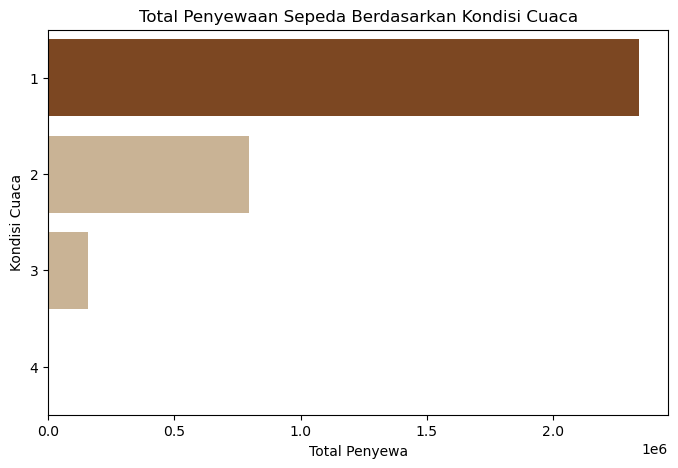

In [287]:
# Hitung total penyewaan berdasarkan kondisi cuaca
weather_count = hour_df.groupby("weathersit")["count"].sum().reset_index()

# Cari nilai tertinggi
max_value = weather_count["count"].max()

# Buat warna, highlight nilai tertinggi
colors = ["#8B4513" if x == max_value else "#D2B48C" for x in weather_count["count"]]

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=weather_count, y="weathersit", x="count", palette=colors, orient="h")
plt.ylabel("Kondisi Cuaca")
plt.xlabel("Total Penyewa")
plt.title("Total Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.show()

Berdasarkan Bar Plot di atas, dapat dilihat bahwa Kondisi Cuaca 1 memiliki paling banyak penyewa dibanding kondisi cuaca lainnya. Hal ini sesuai dengan analisis pada bagian sebelumnya. Menunjukkan bahwa kondisi cuaca *Clear* (Cerah), *Few clouds* (sedikit berawan), *Partly cloudy* (sebagian berawan) adalah yang paling diminati oleh pelanggan. 

#### Pie Chart: Proporsi Penyewaan Sepeda Berdasarkan Cuaca

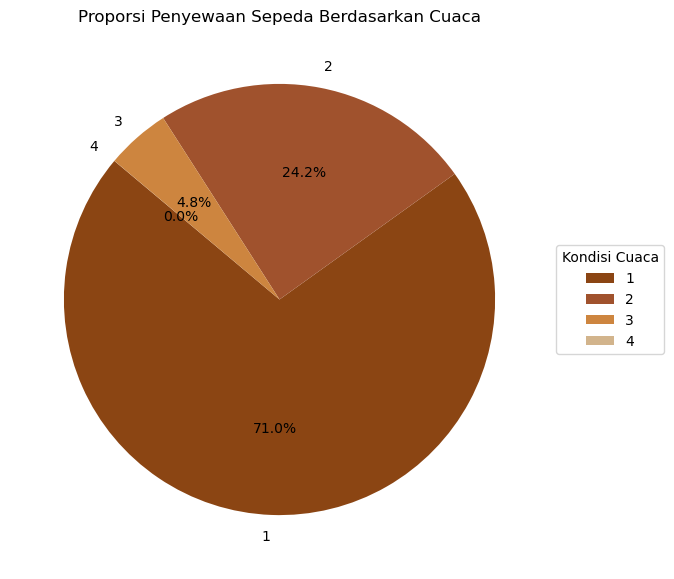

In [297]:
# Kelompokkan data berdasarkan kategori cuaca
weather_rental = hour_df.groupby("weathersit")["count"].sum()

# Warna nuansa coklat yang lebih bervariasi
colors = ["#8B4513", "#A0522D", "#CD853F", "#D2B48C"]

# Buat pie chart
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(weather_rental, labels=weather_rental.index, autopct='%1.1f%%', 
                                   colors=colors, startangle=140)

# Tambahkan legend di luar pie chart
plt.legend(wedges, weather_rental.index, title="Kondisi Cuaca", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title("Proporsi Penyewaan Sepeda Berdasarkan Cuaca")
plt.show()

Berdasarkan visualisasi pie chart juga kondisi cuaca 1, menunjukkan persentasi tertinggi yakni hingga 71%. Hal ini sesuai dengan analisis pada bagian sebelumnya.

### Pertanyaan 2: **Kapan waktu optimal bagi pelanggan untuk menyewa sepeda berdasarkan tren penggunaan?**

##### Line Chart: Tren Penyewaan Sepeda per Jam

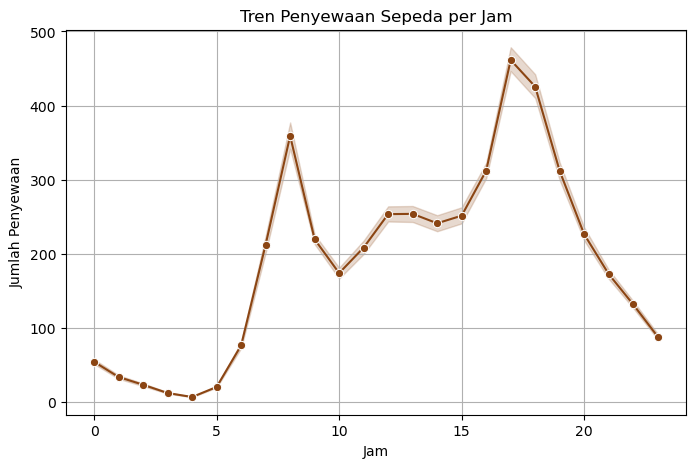

In [290]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=hour_df, x="hour", y="count", marker="o", color="#8B4513")  # Warna coklat
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan")
plt.title("Tren Penyewaan Sepeda per Jam")
plt.grid(True)
plt.show()

Dapat dilihat bahwa terdapat 2 kenaikan signifikan jumlah penyewa, yakni pada pagi dan sore hari, khususnya pukul 08.00 pagi dan pukul 17.00 sore.

##### Heatmap: Penyewaan Sepeda Berdasarkan Waktu

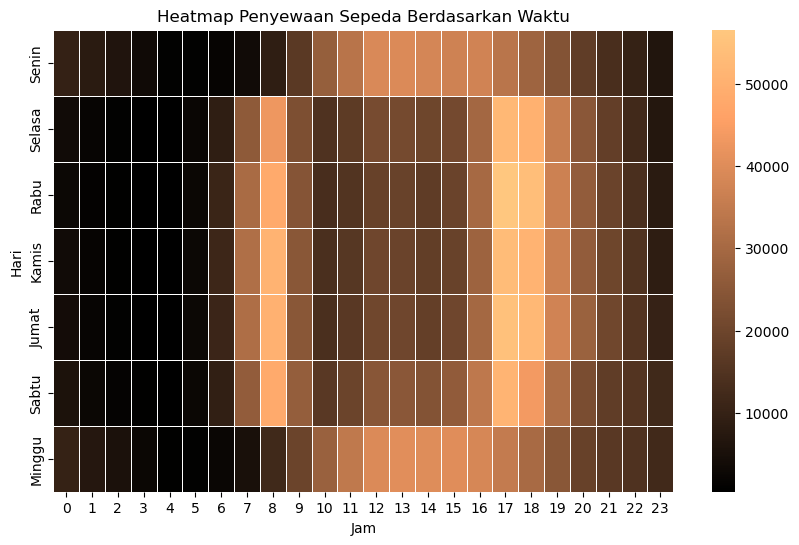

In [293]:
# Mapping angka ke nama hari
weekday_labels = {
    0: "Senin", 1: "Selasa", 2: "Rabu", 3: "Kamis", 4: "Jumat", 5: "Sabtu", 6: "Minggu"
}

# Buat pivot table
pivot_table = hour_df.pivot_table(values="count", index="weekday", columns="hour", aggfunc="sum")

# Ganti index dengan nama hari
pivot_table.index = pivot_table.index.map(weekday_labels)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap="copper", annot=False, fmt=".0f", linewidths=0.5)
plt.xlabel("Jam")
plt.ylabel("Hari")
plt.title("Heatmap Penyewaan Sepeda Berdasarkan Waktu")
plt.show()

Berdasarkan heatmap di atas, juga didapatkan bahwa puncak penyewaan terjadi pada pagi hari (sekitar pukul 07:00-09:00) dan sore hari (sekitar pukul 17:00-19:00). Adapun pada Hari kerja (Senin - Jumat): Pola penggunaan lebih jelas dengan lonjakan pagi dan sore. Sedangkan untuk Akhir pekan (Sabtu - Minggu): Penyewaan lebih merata sepanjang hari, tanpa lonjakan signifikan. 

## Analisis Lanjutan (Opsional)

#### Clustering (Manual Grouping berdasarkan jumlah penyewaan)

Clustering yang digunakan adalah jenis clustering manual, yang bertujuan untuk mengelompokkan jumlah penyewaan sepeda berdasarkan banyaknya penyewa. Dengan teknik ini, dapat diidentifikasi kelompok-kelompok penyewaan yang berada pada kelas yang sama, yakni dengan mmenerapkan aturan bisnis, yang dalam hal ini saya misalkan sebagai Low Usage (0-100), Medium Usage (101-500), dan High Usage (>500).

In [282]:
def categorize_usage(count):
    if count <= 100:
        return "Low Usage"
    elif count <= 500:
        return "Medium Usage"
    else:
        return "High Usage"
hour_df["Usage_Category"] = hour_df["count"].apply(categorize_usage)


C:\Users\Fitri Fatma Dewi\AppData\Local\Temp\ipykernel_9964\1440083372.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette=colors)


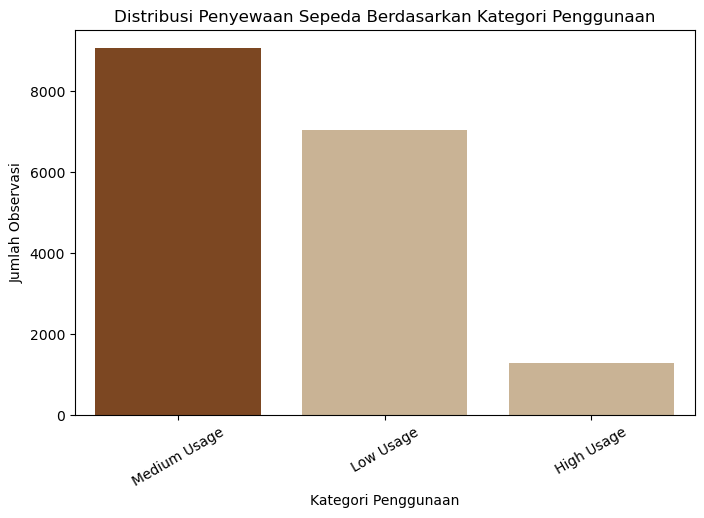

In [295]:
plt.figure(figsize=(8, 5))

# Hitung jumlah per kategori
category_counts = hour_df["Usage_Category"].value_counts()

# Tentukan warna, warna utama lebih muda, warna berbeda untuk tertinggi
colors = ["#D2B48C" if count < category_counts.max() else "#8B4513" for count in category_counts]

sns.barplot(x=category_counts.index, y=category_counts.values, palette=colors)

plt.xlabel("Kategori Penggunaan")
plt.ylabel("Jumlah Observasi")
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Kategori Penggunaan")
plt.xticks(rotation=30)
plt.show()

Berdasarkan clustering di atas, didapatkan bahwa mayoritas penyewaan sepeda berada dalam kategori Medium Usage (101 - 500 penyewaan). Ini menunjukkan bahwa penyewaan sepeda cukup stabil, tetapi tidak selalu mencapai angka yang sangat tinggi. Jika ingin mencapai anga yang lebih tinggi, strategi pemasaran dan peningkatan fasilitas dapat membantu mendorong lebih banyak penyewaan ke kategori High Usage.

## Conclusion

- **Conclution pertanyaan 1:** Penyewaan sepeda tertinggi terjadi pada kondisi cuaca 1 (Clear, Few clouds, Partly cloudy), dengan persentase mencapai 71%. Menunjukkan bahwa suaca cerah, sedikit berawan, dan sebagian berawan menjadi kondisi yang paling diminati pelanggan untuk menyewa sepeda.
- **Conclution pertanyaan 2:** Puncak penyewaan terjadi dua kali sehari, yaitu pagi (07:00-09:00) dan sore (17:00-19:00).Pada hari kerja (Senin-Jumat), Lonjakan penyewaan lebih jelas di pagi dan sore hari.
Sedangkan, pada akhir pekan (Sabtu-Minggu), Penyewaan lebih merata sepanjang hari tanpa lonjakan signifikan.
- **Analisis Lanjutan:** Sebagian besar penyewaan sepeda berada dalam kategori Medium Usage (100 - 499 penyewaan), menunjukkan permintaan yang stabil. Untuk meningkatkan jumlah penyewaan ke High Usage, diperlukan strategi pemasaran dan peningkatan fasilitas.